<a href="https://colab.research.google.com/github/faisal-iut/codes/blob/master/Wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing necessary libraries

* sklearn is the library where different classification algorithms are implemented. We just call the required algorithm class/function and give our training data and parameters

* matplotlib is for visualization (eg. drawing graphs)

In [4]:
# Import Pandas
import pandas as pd

# Import Numpy
import numpy as np

########## Import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.externals import joblib
# Import warnings
import warnings 
warnings.filterwarnings('ignore')

############ Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

# Import Missing Nap
import missingno as msno

# Import Seaborn
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

## 2. Data Loading

###2.1 Code to read csv file from googel drive into Colaboratory:

In [5]:

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
# The shareable data link
train_link = 'https://drive.google.com/file/d/1OA-r-ZOAUsYdK1kgcWP50hSr8BDqj6Fn/view?usp=sharing'
test_link = 'https://drive.google.com/file/d/1QJomCV3zbHnCtJAw7hH0UXLVkJT4Ewai/view?usp=sharing' 

In [7]:
# function to upload the training and testing file from the drive
def link_open(link,filename):
  # getting the file key portion. 
  # eg. 1OA-r-ZOAUsYdK1kgcWP50hSr8BDqj6Fn from https://drive.google.com/file/d/1OA-r-ZOAUsYdK1kgcWP50hSr8BDqj6Fn/view?usp=sharing
  id = link.split('/')
  print (id[5]) 
  downloaded = drive.CreateFile({'id':id[5]}) 
  downloaded.GetContentFile(filename+'.csv')  
  df3 = pd.read_csv(filename+'.csv')
  # Dataset is now stored in a Pandas Dataframe
  return df3

### 2.2 load train data into dataframe

In [8]:

train_df = link_open(train_link, '1592937976_0666611_trainwine')
# print first 10 rows
train_df.head(10)

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exceptio

1OA-r-ZOAUsYdK1kgcWP50hSr8BDqj6Fn


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,B
1,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8,B
2,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8,B
3,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8,G
4,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4,B
5,7.4,0.66,0.00,1.8,0.075,13.0,40,0.9978,3.51,0.56,9.4,B
6,7.9,0.60,0.06,1.6,0.069,15.0,59,0.9964,3.30,0.46,9.4,B
7,7.3,0.65,0.00,1.2,0.065,15.0,21,0.9946,3.39,0.47,10.0,G
8,7.8,0.58,0.02,2.0,0.073,9.0,18,0.9968,3.36,0.57,9.5,G
9,7.5,0.50,0.36,6.1,0.071,17.0,102,0.9978,3.35,0.80,10.5,B


### 2.3 load test data into dataframe



In [9]:
test_df = link_open(test_link, '1592937976_0671594_testwine')

test_df.head(10)

1QJomCV3zbHnCtJAw7hH0UXLVkJT4Ewai


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,9.4,0.500,0.34,3.6,0.082,5.0,14.0,0.99870,3.29,0.52,10.7
1,7.2,0.610,0.08,4.0,0.082,26.0,108.0,0.99641,3.25,0.51,9.4
2,8.6,0.550,0.09,3.3,0.068,8.0,17.0,0.99735,3.23,0.44,10.0
3,5.1,0.585,0.00,1.7,0.044,14.0,86.0,0.99264,3.56,0.94,12.9
4,7.7,0.560,0.08,2.5,0.114,14.0,46.0,0.99710,3.24,0.66,9.6
5,8.4,0.520,0.22,2.7,0.084,4.0,18.0,0.99682,3.26,0.57,9.9
6,8.2,0.280,0.40,2.4,0.052,4.0,10.0,0.99356,3.33,0.70,12.8
7,8.4,0.250,0.39,2.0,0.041,4.0,10.0,0.99386,3.27,0.71,12.5
8,8.2,0.280,0.40,2.4,0.052,4.0,10.0,0.99356,3.33,0.70,12.8
9,7.4,0.530,0.12,1.9,0.165,4.0,12.0,0.99702,3.26,0.86,9.2


### 2.3 Replacing the 11th column Quality values (G, B) with (1, 0)

In [10]:
train_df.Quality = train_df.Quality.map(dict(G=1, B=0))

### 2.4 printing training dataframe info

In [11]:
print(train_df.shape)
train_df.info()

(799, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         799 non-null    float64
 1   volatile acidity      799 non-null    float64
 2   citric acid           799 non-null    float64
 3   residual sugar        799 non-null    float64
 4   chlorides             799 non-null    float64
 5   free sulfur dioxide   799 non-null    float64
 6   total sulfur dioxide  799 non-null    int64  
 7   density               799 non-null    float64
 8   pH                    799 non-null    float64
 9   sulphates             799 non-null    float64
 10  alcohol               799 non-null    float64
 11  Quality               799 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 75.0 KB


## 3. Performing KNN based classification first

### 3.1 first, we will just do a 80-20% split of the train_df dataframe to build our training and testing data from it.

```
Necessary library: from sklearn.model_selection import train_test_split

train_df.iloc[:, :-1] = first 11 columns [training & testing data]
train_df.iloc[:, -1] =  12th column-Quality [training & testing label]
stratify=train_df.iloc[:, -1] = this tells to do the stratified sampling based on quality attributes

```

In [12]:
# Split the the whole data into test and train
X_train, X_test, y_train, y_test = train_test_split(train_df.iloc[:, :-1], train_df.iloc[:, -1],
                                                    test_size=0.20, random_state=1, stratify=train_df.iloc[:, -1]) 

### 3.2 You can always print to understand/see the shape and values of the data being prepared in each step

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(639, 11)
(639,)
(160, 11)
(160,)


### 3.3 function to define the KNN algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  

def knn_classification(X_train, y_train):
  classifier = KNeighborsClassifier(n_neighbors=8)  
  classifier.fit(X_train, y_train)
  return classifier  

###3.4 function to define evaluation matrics (classification report: accuracy, precision, recall)

### You can read what does it means:
  https://datascience.stackexchange.com/questions/64441/how-to-interpret-classification-report-of-scikit-learn 

In [ ]:
def evaluation(classifier, y_test, y_pred, target_names, title):  
  print(title)
  print('Accuracy: ',accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred, target_names=target_names))

###3.5 performing classification using KNN, predicting using X_test and evaluating result using predicted value and ground truth value

In [ ]:
classifier =  knn_classification(X_train, y_train)
y_pred = classifier.predict(X_test)
evaluation(classifier, y_test, y_pred,['Bad','Good'], 'Classification report (knn):')

Classification report (knn):
Accuracy:  0.68125
              precision    recall  f1-score   support

         Bad       0.67      0.80      0.73        85
        Good       0.71      0.55      0.62        75

    accuracy                           0.68       160
   macro avg       0.69      0.67      0.67       160
weighted avg       0.69      0.68      0.68       160



###3.6 Here I have just tried another statistical data deriving method named standerd scaler to transform the data. You can read theh explanation here:

https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler


In [ ]:
# applying standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

###3.7 running knn again on the transformed data now.
* looks like no improvement in result

In [ ]:
classifier =  knn_classification(X_train, y_train)
y_pred = classifier.predict(X_test)
evaluation(classifier, y_test, y_pred,['Bad','Good'], 'Classification report (knn):')

Classification report (knn):
Accuracy:  0.6875
              precision    recall  f1-score   support

         Bad       0.67      0.81      0.73        85
        Good       0.72      0.55      0.62        75

    accuracy                           0.69       160
   macro avg       0.69      0.68      0.68       160
weighted avg       0.69      0.69      0.68       160



##4. Importing PCA
 * remember I said, I tried reducing no of feature using an algorithm called PCA (PRINCIPAL COMPONENT ANALYSIS) ?
 * Here I am just defining a function to do PCA on our data later on.
 * you can read more here: https://setosa.io/ev/principal-component-analysis/

In [ ]:
from sklearn.decomposition import PCA
def do_pca(X_train, X_test,n):
  pca = PCA(n_components = n)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  return X_train, X_test

##5. Just puting our training features into X, labels into y and test dataset into ev_X variable
* print these if you have confusion

In [ ]:
X = train_df.iloc[:, :-1]
y = train_df.iloc[:, -1]
ev_X = test_df

##6. Defining a function to do grid search with cross fold validation

* here it will iterate over all the parameters given and will find the best estimator
* will do n-fold cross validation

* more explanation:
https://medium.com/datadriveninvestor/an-introduction-to-grid-search-ff57adcc0998#:~:text=Grid%20search%20is%20the%20process,the%20hyper%20parameter%20values%20specified.


```
grid_search_cv(classifier, param_grid, n_fold,X,y) function parameters:
  classifier = the provided classifier (eg. knn, svm, random forest)
  param_grid = parameter list to iterate over (eg. no of neighbours in case of knn)
  n_fold = number of fold in cross validation
  X = training features
  y = training labels

  return value:
    thins function will return a list containing all the 
    estimator attributes (grid.cv_results_) and the best estimator (grid.best_estimator_)
   
```

In [ ]:
def grid_search_cv(classifier, param_grid, n_fold,X,y):
  # instantiate the grid
  grid = GridSearchCV(classifier, param_grid, cv=n_fold, scoring='accuracy',verbose = 1)
  # fit the grid with data
  grid.fit(X, y)
  print(grid.cv_results_.keys())
  # view the complete results (list of named tuples)
  grid_result = pd.DataFrame(grid.cv_results_)
  print("best estimator: ",grid.best_estimator_)
  print("best score:", grid.best_score_)
  return grid_result, grid.best_estimator_

##7. Trying different classification model with grid search
  * Now we will try different classifications (knn, svm) with grid search
  * We will send the classifier parameters to iterate over and using grid searh, will find the best estimator

###7.1 KNN with grid search
 * parameters: number of neighbours (1 to 31)

In [ ]:
# defining a python dictionary to save the best estimators
estimators = {}
knn = KNeighborsClassifier()  
# define the parameter values that should be searched
# k_range = range(1, 31) [neighbour number list]
k_range = list(range(1, 31))
print(k_range)
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)
#sending classifier, parameters, training features and labels to the grid_search function
grid_result,best_est  = grid_search_cv(knn, param_grid, 10, X,y)
#save best estimator of knn to estimators dictionary
estimators['knn'] = best_est

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
best estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')
best score: 0.6733386075949366


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.3s finished


### just ploting the no of neighbours vs mean accuracy. We cas see, optimal result is happens when no of neighbour is 14

Text(0, 0.5, 'Cross-validated accuracy')

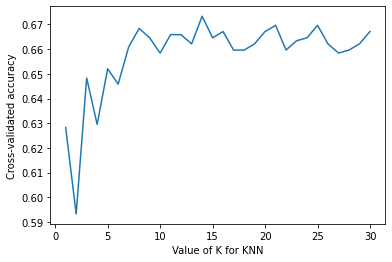

In [ ]:
# Plot accuracy for every k number between 1 and 26
plt.plot(grid_result['param_n_neighbors'], grid_result['mean_test_score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')


###7.2 SVM (support vector machine) with grid search
 * parameters: C, gamma, kernel choice

In [ ]:
##using svm
classifier_svm = SVC()
param_grid = {'C': [.01, .1, 1, 10, 100, 1000],
                  'gamma': [0.0001, 0.001, 0.01, .1, 1, 10, 100, 1000],'kernel': ['rbf', 'sigmoid']}
print(param_grid)
grid_result,best_est  = grid_search_cv(classifier_svm, param_grid, 10, X,y)
estimators['svm'] = best_est

{'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['rbf', 'sigmoid']}
Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
best estimator:  SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
best score: 0.7196360759493671


[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:   27.2s finished


###7.3 Random forest with grid search

In [ ]:
#import PipeLine, SelectKBest transformer, and RandomForest estimator classes
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier

#initialize randomforest
clf = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True)

#Create the parameter grid, entering the values to use for each parameter selected in the RandomForest estimator
param_grid = { 
    'n_estimators': [20,50,100,200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}
print(param_grid)
grid_result, best_est  = grid_search_cv(clf, param_grid, 10, X,y)
estimators['clf'] = best_est

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'n_estimators': [20, 50, 100, 200, 700], 'max_features': ['auto', 'sqrt', 'log2']}
Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.8min finished


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
best estimator:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)
best score: 0.7133386075949367


###7.4 Random forest (with SMOTE transformation) with grid search
 * Before sending to grid search, we fitted X, y data using SMOTE algorithm. This might help in reducing the effect of imbalance in data (eg. disproportionate ratio of quality class (1 & 0) data)

In [ ]:
# Import SMOTE module
from imblearn.over_sampling import SMOTE
# Create model SMOTE and fit the training set to create a new training set
sm = SMOTE(random_state = 2) 
X_sm, y_sm = sm.fit_sample(X, y.ravel())

#initialize randomforest
clf = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True)

#Create the parameter grid, entering the values to use for each parameter selected in the RandomForest estimator
param_grid = { 
    'n_estimators': [20,50,100,200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}
print(param_grid)
grid_result, best_est  = grid_search_cv(clf, param_grid, 10, X_sm,y_sm.ravel())
estimators['clf-smote'] = best_est

{'n_estimators': [20, 50, 100, 200, 700], 'max_features': ['auto', 'sqrt', 'log2']}
Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.8min finished


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
best estimator:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)
best score: 0.7564705882352942


##8. Data/feature visualization to understand characteristics

###8.1 Doing correlation analysis among quality and other features

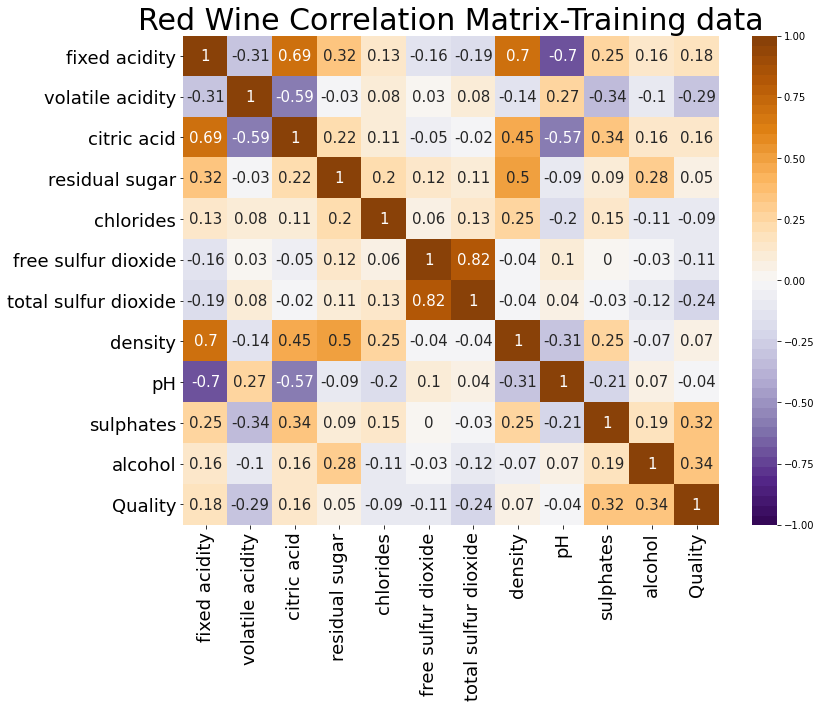

In [ ]:
def confusion_matrix_plot(data, title = "Red Wine Correlation Matrix", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="spearman"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 30)
    ax.title.set_position([.5, 1.03])
    ax.set_xticklabels(labels = conf_mat.index, fontsize = 18)
    ax.set_yticklabels(labels = conf_mat.index, fontsize = 18)
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(train_df, title = "Red Wine Correlation Matrix-Training data")

### From the figure above,
####  Positively correlated with quality:
  * sulphates
  * alchohol
  
####  Negatively correlated with quality:
  * volatile acidity
  * total sulfer di-oxide

####  Close to neutral or having little correlation with quality
  * residual suger 


###8.2 Drawing histogram, to understand the skewness of feature values

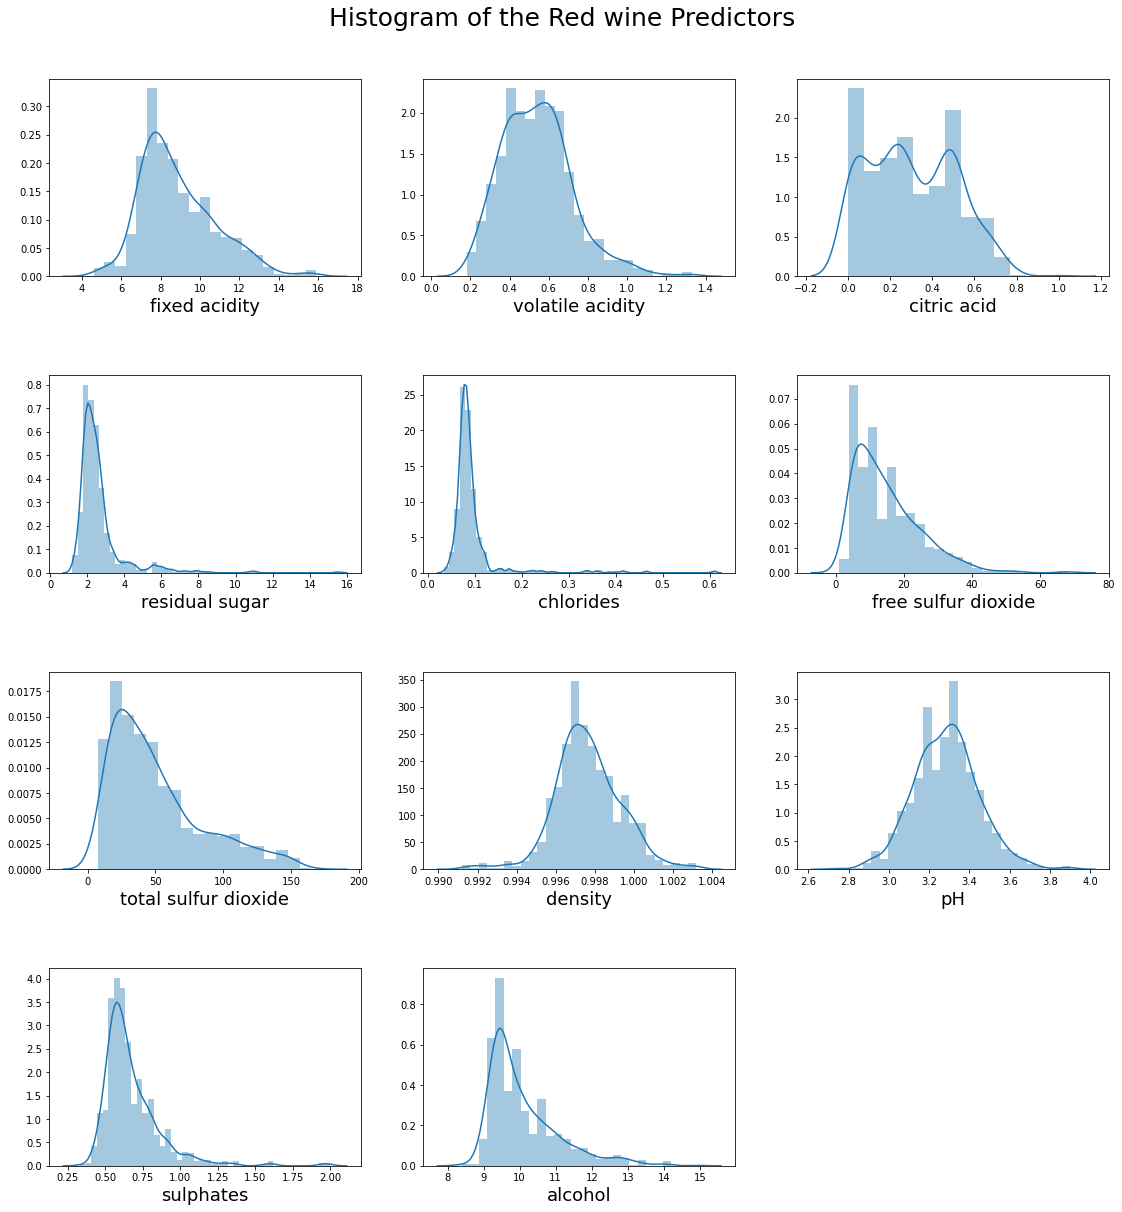

In [ ]:
from matplotlib import font_manager as fm
def subplot_hist(data, row = 4, column = 3, title = "Subplots", height = 20, width = 19):
    # Create a figure instance, and the two subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=25, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        sns.distplot(data.iloc[:, i], ax=ax)
        ax.xaxis.get_label().set_font_properties(fm.FontProperties(size = 18))
    # Show the plot
    plt.show()
    
subplot_hist(train_df.iloc[:, :-1], row = 4, column = 3, title = "Histogram of the Red wine Predictors")

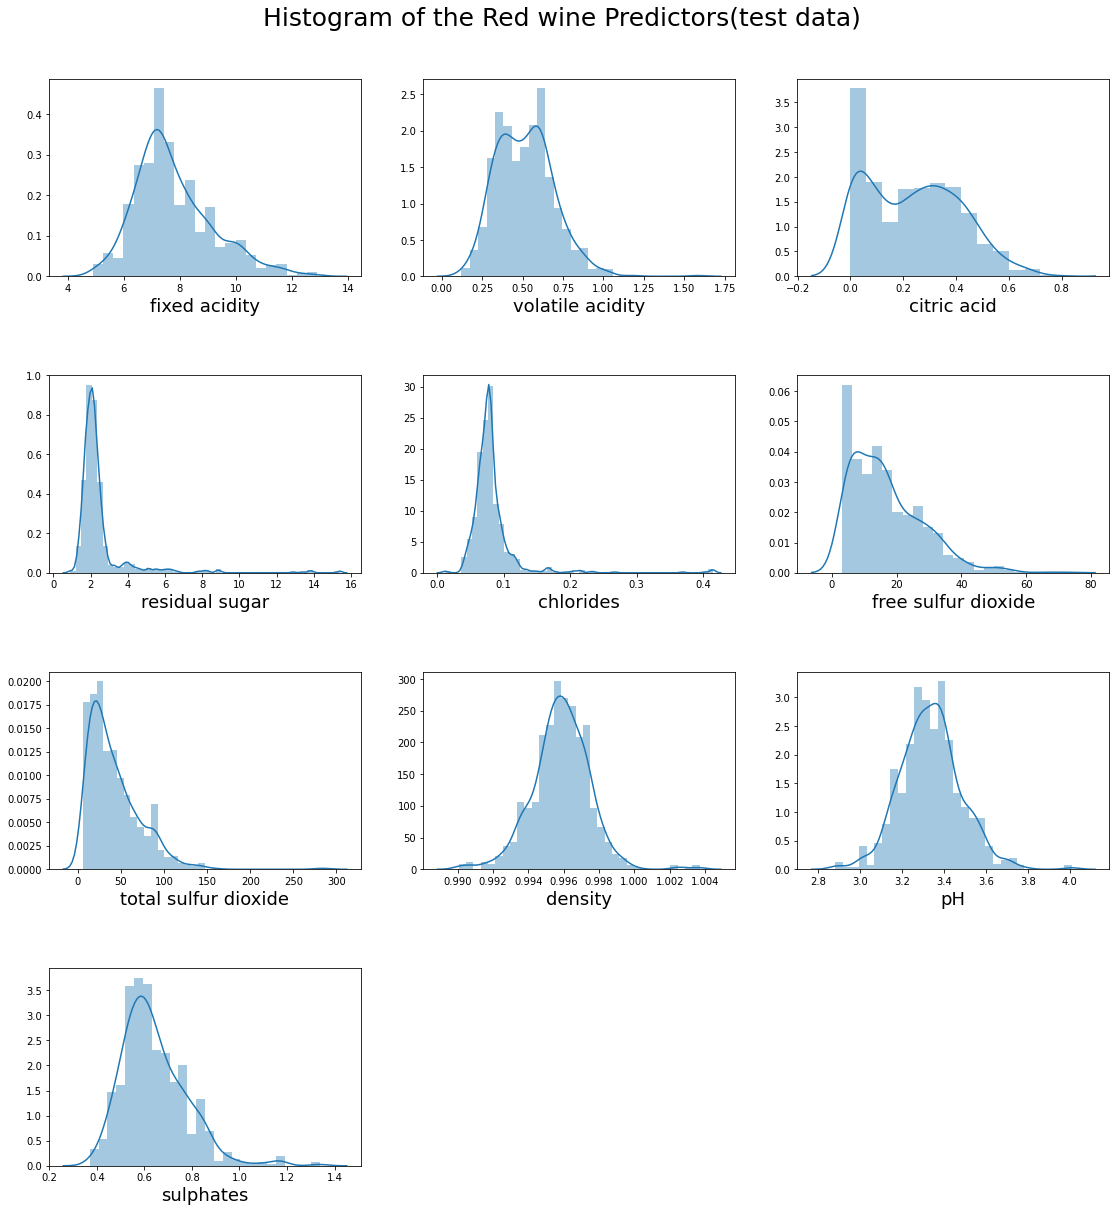

In [ ]:
subplot_hist(test_df.iloc[:, :-1], row = 4, column = 3, title = "Histogram of the Red wine Predictors(test data)")

###8.3 From the figures above, we can see there are many 0 values in citric acid. This might effect the prediction quality. So we shift all citric acid data point 0.1 to the right.

In [ ]:
train_df[["citric acid"]] += 0.1
test_df[["citric acid"]] += 0.1

###8.4 find out, which features are heavily skewed

In [ ]:
# Computing the skewness into dataFrame
from scipy import stats as st
def skewness_check(data):
    # Find the skewness in the dataset
    skew_value = list(st.skew(data))
    skew_string = []
    # Looping through the skew value to find the Skew category
    for skew in skew_value:
        if skew >= -.5 and skew <= .5:
            skew_string.append("Light Skewed")
        elif skew <= -.5 and skew >= -1 and skew <= .5 and skew >= 1:
            skew_string.append("Moderately Skewed")
        else:
            skew_string.append("Heavily Skewed")
    # Ctreating data frame
    skew_df = pd.DataFrame({'Column': data.columns, 'Skewness': skew_value, 'Skew Category': skew_string})
    return skew_df

# Skewness for Red Wine
skewness_check(train_df.iloc[:, :-1])

,Column,Skewness,Skew Category
0,fixed acidity,0.810972,Heavily Skewed
1,volatile acidity,0.740758,Heavily Skewed
2,citric acid,0.221593,Light Skewed
3,residual sugar,3.850122,Heavily Skewed
4,chlorides,5.355365,Heavily Skewed
5,free sulfur dioxide,1.364448,Heavily Skewed
6,total sulfur dioxide,1.127107,Heavily Skewed
7,density,0.024203,Light Skewed
8,pH,0.210584,Light Skewed
9,sulphates,2.647054,Heavily Skewed


In [ ]:
skewness_check(test_df.iloc[:, :-1])

,Column,Skewness,Skew Category
0,fixed acidity,0.826386,Heavily Skewed
1,volatile acidity,0.594565,Heavily Skewed
2,citric acid,0.293797,Light Skewed
3,residual sugar,4.895671,Heavily Skewed
4,chlorides,5.569797,Heavily Skewed
5,free sulfur dioxide,1.125903,Heavily Skewed
6,total sulfur dioxide,2.024744,Heavily Skewed
7,density,0.096957,Light Skewed
8,pH,0.295532,Light Skewed
9,sulphates,1.157455,Heavily Skewed


###8.5 boxcox transformation can convert heavily skewed data to lightly skewed. This is just for data visualization. Whe haven't used this transformed data in our classification

In [ ]:
# Boxcox Tranformation
def boxcox_trans(data):
    for i in range(data.shape[1]):
        data.iloc[:, i], _ = st.boxcox(data.iloc[:, i])
    return data

# boxcox train data
train_box = train_df.copy(deep = True)
train_box.iloc[:, :-1] = boxcox_trans(train_box.iloc[:, :-1])
skewness_check(train_box.iloc[:, :-1])

,Column,Skewness,Skew Category
0,fixed acidity,-0.001142,Light Skewed
1,volatile acidity,-0.001267,Light Skewed
2,citric acid,-0.130592,Light Skewed
3,residual sugar,-0.026786,Light Skewed
4,chlorides,-0.283235,Light Skewed
5,free sulfur dioxide,-0.008266,Light Skewed
6,total sulfur dioxide,0.000926,Light Skewed
7,density,-0.001520,Light Skewed
8,pH,-0.001327,Light Skewed
9,sulphates,-0.022264,Light Skewed


In [ ]:
# boxcox test data
test_box = test_df.copy(deep = True)
test_box.iloc[:, :-1] = boxcox_trans(test_box.iloc[:, :-1])
skewness_check(test_box.iloc[:, :-1])

,Column,Skewness,Skew Category
0,fixed acidity,0.001682,Light Skewed
1,volatile acidity,-0.001805,Light Skewed
2,citric acid,-0.114238,Light Skewed
3,residual sugar,-0.171963,Light Skewed
4,chlorides,-0.261834,Light Skewed
5,free sulfur dioxide,-0.035131,Light Skewed
6,total sulfur dioxide,-0.010021,Light Skewed
7,density,-0.011304,Light Skewed
8,pH,-0.007429,Light Skewed
9,sulphates,-0.002826,Light Skewed


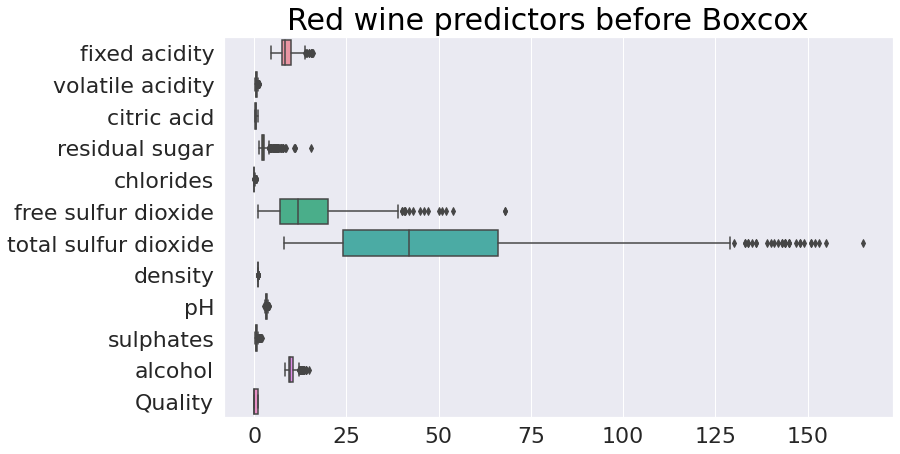

In [ ]:
# Custom boxplot
def box_plot(data, height = 7, width = 12, title = "Boxplot"):
    # Make the figure object
    plt.figure(figsize=(width, height))
    # Add title
    plt.suptitle(title, y = 0.94, fontsize = 30)
    # Scale the font size
    sns.set(font_scale = 2)
    # Create the boxplot
    sns.boxplot(data = data, orient = "h")
    
box_plot(data = train_df, title = "Red wine predictors before Boxcox")

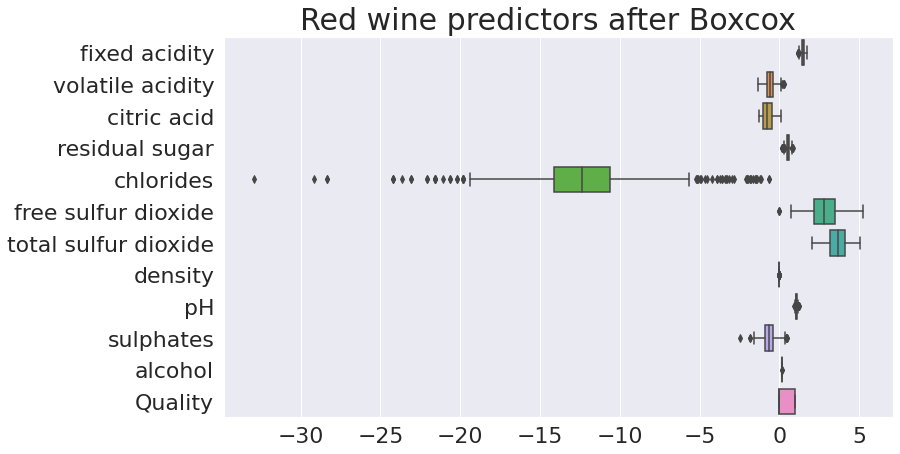

In [ ]:
box_plot(data = train_box, title = "Red wine predictors after Boxcox")

## 9. Same classification experiments with reduced features.

### We will do same classification tasks again (eg. knn, svm) after removing slightly correlated feature (eg. residual suger)

In [ ]:
print(train_df.columns)
col_to_remove = ['residual sugar']
train_copied = train_df.copy(deep = True)
test_copied = test_df.copy(deep = True)
train_copied = train_copied.drop(col_to_remove, axis =1)
test_copied = test_copied.drop(col_to_remove, axis =1)
X = train_copied.iloc[:, :-1]
y = train_copied.iloc[:, -1]
train_copied.head(10)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Quality'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,7.4,0.70,0.10,0.076,11.0,34,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.10,0.098,25.0,67,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.14,0.092,15.0,54,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.66,0.075,17.0,60,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.10,0.076,11.0,34,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.10,0.075,13.0,40,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.16,0.069,15.0,59,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.10,0.065,15.0,21,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.12,0.073,9.0,18,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.46,0.071,17.0,102,0.9978,3.35,0.80,10.5,0


### 9.1 knn with non correlated feature

In [ ]:
knn = KNeighborsClassifier()  
# define the parameter values that should be searched
# k_range = range(1, 31)
k_range = list(range(1, 31))
print(k_range)
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)
grid_result, best_est  = grid_search_cv(knn, param_grid, 10, X,y)
estimators['knn-no-rs'] = best_est

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
best estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')
best score: 0.6783860759493672


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    2.2s finished


###9.2 svm with non correlated feature

In [ ]:
##using svm
classifier_svm = SVC()
param_grid = {'C': [.01, .1, 1, 10, 100, 1000],
                  'gamma': [0.0001, 0.001, 0.01, .1, 1, 10, 100, 1000],'kernel': ['rbf', 'sigmoid']}
print(param_grid)
grid_result, best_est  = grid_search_cv(classifier_svm, param_grid, 10, X,y)
estimators['svm-no-rs'] = best_est

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': [0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['rbf', 'sigmoid']}
Fitting 10 folds for each of 96 candidates, totalling 960 fits
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
best estimator:  SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
best score: 0.7095886075949368


[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:   26.8s finished


###9.3 Random forest with non correlated feature

In [ ]:
#import PipeLine, SelectKBest transformer, and RandomForest estimator classes
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier

#initialize randomforest
clf = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True)

#Create the parameter grid, entering the values to use for each parameter selected in the RandomForest estimator
param_grid = { 
    'n_estimators': [20,50,100,200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}
print(param_grid)
grid_result, best_est  = grid_search_cv(clf, param_grid, 10, X,y)
estimators['clf-no-rs'] = best_est

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'n_estimators': [20, 50, 100, 200, 700], 'max_features': ['auto', 'sqrt', 'log2']}
Fitting 10 folds for each of 15 candidates, totalling 150 fits
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
best estimator:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
 

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.8min finished


###9.4 Random forest with SMOTE on non correlated feature

In [ ]:
# Import SMOTE module
from imblearn.over_sampling import SMOTE
# Create model and fit the training set to create a new training set
sm = SMOTE(random_state = 2) 
X_sm, y_sm = sm.fit_sample(X, y.ravel())

#initialize randomforest
clf = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True)

#Create the parameter grid, entering the values to use for each parameter selected in the RandomForest estimator
param_grid = { 
    'n_estimators': [20,50,100,200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}
print(param_grid)
grid_result, best_est  = grid_search_cv(clf, param_grid, 10, X_sm,y_sm.ravel())
estimators['clf-smote-no-rs'] = best_est

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'n_estimators': [20, 50, 100, 200, 700], 'max_features': ['auto', 'sqrt', 'log2']}
Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.8min finished


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
best estimator:  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)
best score: 0.7576470588235295


###9.5 And decision tree with non correlated feature

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
scl = ('scl', StandardScaler())
rdm = ('rdm', RFECV(estimator=DecisionTreeClassifier(random_state=42), scoring='accuracy'))
clf = ('clf', DecisionTreeClassifier(random_state=42))

param_grid = [{'rdm__step': [0.02],
               'clf__criterion': ['gini', 'entropy']}]


pipe = Pipeline([scl, rdm, clf])
print(param_grid)
grid_result, best_est  = grid_search_cv(pipe, param_grid, 10, X_sm,y_sm.ravel())
estimators['ds-no-rs'] = best_est

[{'rdm__step': [0.02], 'clf__criterion': ['gini', 'entropy']}]
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.9s finished


dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_clf__criterion', 'param_rdm__step', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
best estimator:  Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rdm',
                 RFECV(cv=None,
                       estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                     

##10. Doing prediction on test data file using all the best estimators we found till now.


In [ ]:
import pickle
###file path to data save and load
g_path = '/content/drive/My Drive/colab data/'
### this line is for discarding blank space in end of line while saving
NEWLINE_SIZE_IN_BYTES = -1  # -2 on Windows?
###lists that help to select right data(all data vs data with discarded correlation)
rs = ['knn','svm','clf','clf-smote']
smote = ['clf-smote', 'clf-smote-no-rs']
no_rs = ['knn-no-rs','svm-no-rs','clf-no-rs','clf-smote-no-rs','ds-no-rs']
###save estimator dictionaly to drive
with open(g_path+'estimators.pickle', 'wb') as handle:
    pickle.dump(estimators, handle, protocol=pickle.HIGHEST_PROTOCOL)
###iterate over estimator dictionary:[name(eg. 'knn','svm'), desc(eg. estimator description)]
for name, desc in estimators.items():
  ###for all data select rain_df as X
  if name in rs:
    X = train_df.iloc[:, :-1]
    y = train_df.iloc[:, -1]
    ev_X = test_df
  else:
  ###for classifier trained on data points without residual suger select train_copied (train_copied doesn't have the residual suger colun)
    X = train_copied.iloc[:, :-1]
    y = train_copied.iloc[:, -1]
    ev_X = test_copied
  if name in smote:
  ###select smote transformation for random forest estimators :['clf-smote', 'clf-smote-no-rs']
    sm = SMOTE(random_state = 2) 
    X, y = sm.fit_sample(X, y.ravel())
    X, ev_X = do_pca(X, ev_X, 8)
  # Split the the whole data into test and train
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, 
                                                    stratify=y)
  estimators[name].fit(X_train,y_train)
  y_pred = estimators[name].predict(X_test)
  evaluation(estimators[name], y_test, y_pred,['Bad','Good'], 'Classification report ['+ name+'] :')

  ###now fit on whole train data (800 rows)
  estimators[name].fit(X,y)
  ###predict on the given test data file (800 rows)
  y_pred = estimators[name].predict(ev_X)
  ###save the predicted results in text files. These are the files to upload in submission
  with open(g_path+name+'.txt', 'wb') as fout:  # Note 'wb' instead of 'w'
    np.savetxt(fout, y_pred, fmt='%d')
    fout.seek(NEWLINE_SIZE_IN_BYTES, 2)
    fout.truncate()


Classification report [knn] :
Accuracy:  0.66875
              precision    recall  f1-score   support

         Bad       0.65      0.80      0.72        85
        Good       0.70      0.52      0.60        75

    accuracy                           0.67       160
   macro avg       0.68      0.66      0.66       160
weighted avg       0.67      0.67      0.66       160

Classification report [svm] :
Accuracy:  0.7375
              precision    recall  f1-score   support

         Bad       0.72      0.84      0.77        85
        Good       0.77      0.63      0.69        75

    accuracy                           0.74       160
   macro avg       0.74      0.73      0.73       160
weighted avg       0.74      0.74      0.73       160

Classification report [clf] :
Accuracy:  0.775
              precision    recall  f1-score   support

         Bad       0.76      0.84      0.80        85
        Good       0.79      0.71      0.75        75

    accuracy                          

### We can see from the output, the best result we found for 'clf-smote-no-rs' classifier. That is random forest with SMOTE when we discarded residual suger.

###11 Doing just an extra experiment by reducing the feature no to 5 using PCA. This doesn't give good result

In [ ]:
import pickle
g_path = '/content/drive/My Drive/colab data/'
with open(g_path+'estimators.pickle', 'rb') as handle:
    estimators = pickle.load(handle)

X = train_copied.iloc[:, :-1]
y = train_copied.iloc[:, -1]

# Split the the whole data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, 
                                                  stratify=y)
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

name = 'clf-smote-no-rs'
estimators[name].fit(X_train,y_train)
y_pred = estimators[name].predict(X_test)
evaluation(estimators[name], y_test, y_pred,['Bad','Good'], 'Classification report ['+ name+'] :')

Classification report [clf-smote-no-rs] :
Accuracy:  0.79375
              precision    recall  f1-score   support

         Bad       0.78      0.86      0.82        85
        Good       0.82      0.72      0.77        75

    accuracy                           0.79       160
   macro avg       0.80      0.79      0.79       160
weighted avg       0.80      0.79      0.79       160



In [ ]:
###just printing the estimator dictionary
estimators

{'clf': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='log2',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                        oob_score=True, random_state=None, verbose=0,
                        warm_start=False),
 'clf-no-rs': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=20, 